# Example for a standard interleaved measurement

Using `path_finder` assumes having recorded/saved the data in an interleaved way.

In [1]:
import numpy as np
import glob
import os
import DataLoading as dl
import DataPlotting as dp

In [2]:
parent_folder = '/Volumes/MYUSB/Felix_Alt_BD/2025-01-11 15982/'
pattern = 'Rng_C_1_Nts_Standard2'

substrate_paths, sample_paths = dl.path_finder(parent_folder, pattern)

Found 21 substrate and 20 sample folders.



In [3]:
h = 2

sample_data = dl.DataSet(sample_paths)
dl.balanced_correction_exp(sample_data, harmonic=h)
dl.apply_correction(sample_data)
dl.transform(sample_data)

substrate_data = dl.DataSet(substrate_paths)
dl.balanced_correction_exp(substrate_data, harmonic=h)
dl.apply_correction(substrate_data)
dl.transform(substrate_data)

Read metadata from /Volumes/MYUSB/Felix_Alt_BD/2025-01-11 15982/2025-01-11 175924 NF S Rng_C_1_Nts_Standard2/2025-01-11 175924 NF S Rng_C_1_Nts_Standard2 Interferograms.txt
Number of paths provided: 20
Total number of interferograms read: 20

############################
Matching factors
Scaling factor: 3.14 +- 0.1
Phase factor: -2.73 +- 0.03
############################

Applying global matching factor.

Transforming interferograms.

Read metadata from /Volumes/MYUSB/Felix_Alt_BD/2025-01-11 15982/2025-01-11 175913 NF S Rng_C_1_Nts_Standard2/2025-01-11 175913 NF S Rng_C_1_Nts_Standard2 Interferograms.txt
Number of paths provided: 21
Total number of interferograms read: 21

############################
Matching factors
Scaling factor: 3.23 +- 0.12
Phase factor: -2.73 +- 0.02
############################

Applying global matching factor.

Transforming interferograms.



Interleaved measurement detected.

Mean phase standard deviation: 31.15 mrad
Mean phase standard deviation (raw): 147.57 mrad
Improvement factor of means: 4.74
Mean improvement factor: 4.64


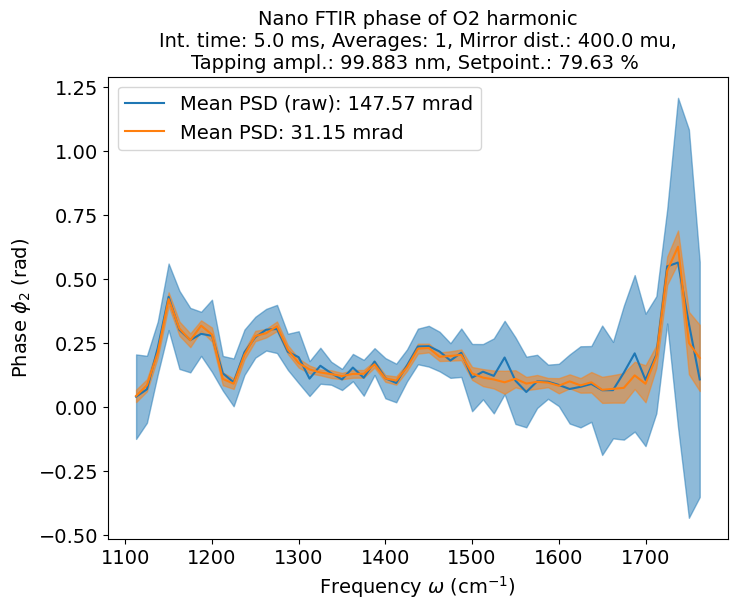

In [4]:
%matplotlib inline
lolim, hilim = 1100, 1770
plot_indv = False

stp = dp.StandardTwoPoint(data_sample=sample_data, data_substrate=substrate_data, harmonic=h)
stp.plot(lolim=lolim, hilim=hilim, plot_indv=plot_indv)

In [8]:
sample_data.meta_data

{'date': '01/11/2025',
 'interferometerDistance': 400.0,
 'tappingAmplitude': 99.883,
 'setpoint': 79.63,
 'globalMatchingFactor': np.complex128(-2.87634687447896-1.2470005464804956j),
 'baseFile': '/Volumes/MYUSB/Felix_Alt_BD/2025-01-11 15982/2025-01-11 175924 NF S Rng_C_1_Nts_Standard2/2025-01-11 175924 NF S Rng_C_1_Nts_Standard2 Interferograms.txt',
 'second_globalMatchingFactor': None}

{'date': '01/11/2025', 'interferometerDistance': 400.0, 'tappingAmplitude': 99.883, 'setpoint': 79.63, 'globalMatchingFactor': np.complex128(-2.87634687447896-1.2470005464804956j), 'baseFile': '/Volumes/MYUSB/Felix_Alt_BD/2025-01-11 15982/2025-01-11 175924 NF S Rng_C_1_Nts_Standard2/2025-01-11 175924 NF S Rng_C_1_Nts_Standard2 Interferograms.txt', 'second_globalMatchingFactor': None}
Mean amplitude standard deviation (raw): 11.9
Mean amplitude signal (raw): 125.3
Mean ampl. SNR (raw): 10.5


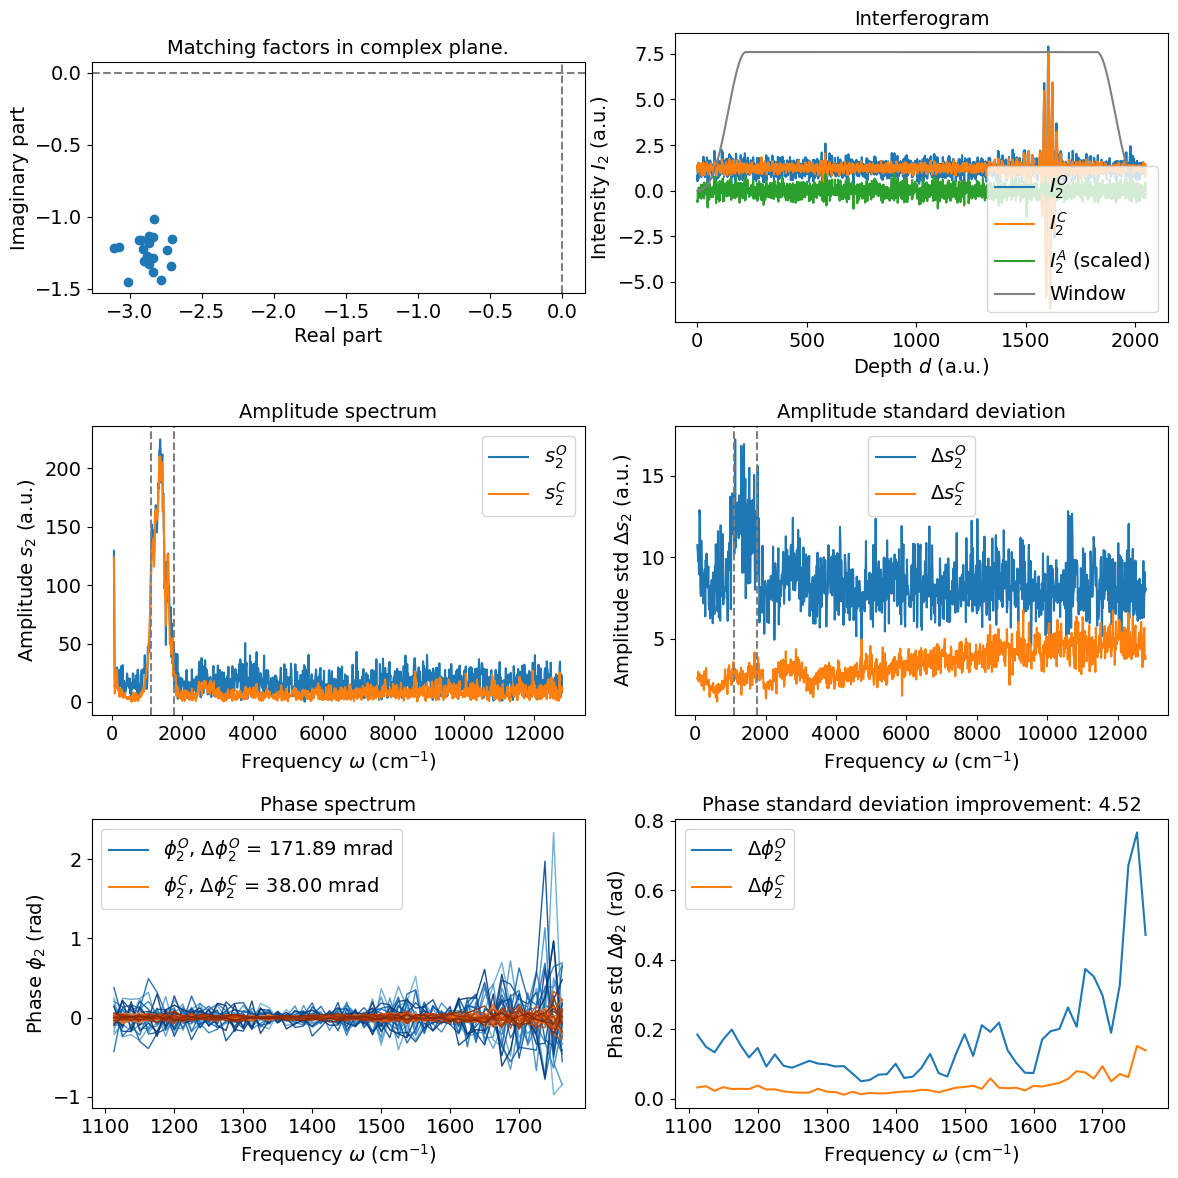

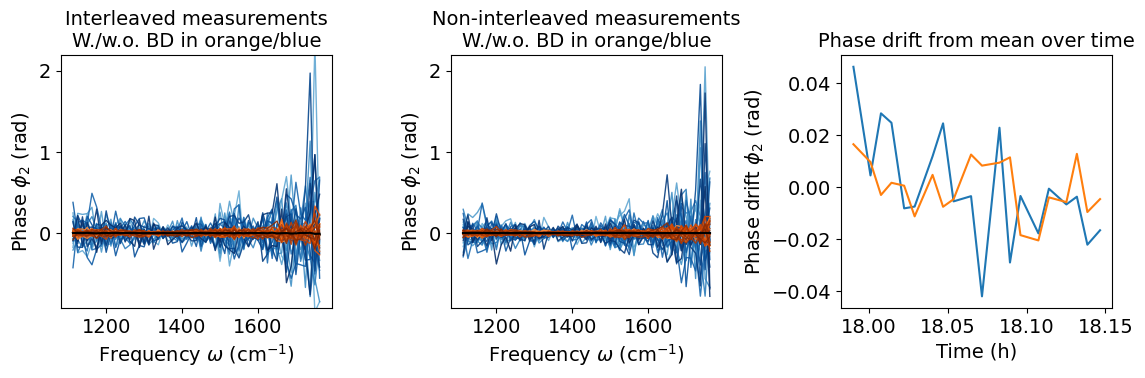

In [7]:
dp.quantify_data_set(sample_data, lolim=lolim, hilim=hilim, harmonic=h)

# Example for a linescan

In [6]:
parent_folder = '/Volumes/MYUSB/250130_Felix_Hyperspec 2/2025-01-31 16466 Linescans/'
pattern = 'D_2048_T_1C2_LS'

paths = []
for folder in sorted(os.listdir(parent_folder)):
    if not folder.startswith('._') and folder.split('NF LS ')[-1] == pattern:
        paths.append(os.path.join(parent_folder, folder))

In [7]:
ls_data = dl.DataSet(paths, header=29)
dl.full_process(ls_data, harmonic=h)

Read metadata from /Volumes/MYUSB/250130_Felix_Hyperspec 2/2025-01-31 16466 Linescans/2025-01-31 163540 NF LS D_2048_T_1C2_LS/2025-01-31 163540 NF LS D_2048_T_1C2_LS Interferograms.txt
Number of paths provided: 20
Total number of interferograms read: 1400

############################
Matching factors
Scaling factor: 1.36 +- 0.06
Phase factor: 3.04 +- 2.24
############################

Applying global matching factor.

Transforming interferograms.



In [11]:
%matplotlib qt
lolim, hilim = 1100, 1550
vmin = 0
vmax = 0.7
cmap = 'viridis'
norm_region = (55, -1)

ls = dp.LineScan(data_set=ls_data, harmonic=h)
ls.plot(lolim=lolim, hilim=hilim, vmin=vmin, vmax=vmax, cmap=cmap, norm_region=norm_region)